# Activation function, NN

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

### load cifra_10

In [2]:
#loading cifar10 data
import numpy as np
import matplotlib.pyplot as plt
import pickle
import sys
import os

"""
The CIFAR-10 dataset consists of 60000 32x32 colour images in 10 classes, with 6000 images per class. There are 50000 
training images and 10000 test images.
The dataset is divided into five training batches and one test batch, each with 10000 images. The test batch contains 
exactly 1000 randomly-selected images from each class. The training batches contain the remaining images in random 
order, but some training batches may contain more images from one class than another. Between them, the training 
batches contain exactly 5000 images from each class.
"""


def load_batch(f_path, label_key='labels'):
    """Internal utility for parsing CIFAR data.
    # Arguments
        fpath: path the file to parse.
        label_key: key for label data in the retrieve
            dictionary.
    # Returns
        A tuple `(data, labels)`.
    """
    with open(f_path, 'rb') as f:
        if sys.version_info < (3,):
            d = pickle.load(f)
        else:
            d = pickle.load(f, encoding='bytes')
            # decode utf8
            d_decoded = {}
            for k, v in d.items():
                d_decoded[k.decode('utf8')] = v
            d = d_decoded
    data = d['data']
    labels = d[label_key]

    data = data.reshape(data.shape[0], 3, 32, 32)
    return data, labels


def load_data(path, negatives=False):
    """Loads CIFAR10 dataset.
    # Returns
        Tuple of Numpy arrays: `(x_train, y_train), (x_test, y_test)`.
    """

    num_train_samples = 50000

    x_train_local = np.empty((num_train_samples, 3, 32, 32), dtype='uint8')
    y_train_local = np.empty((num_train_samples,), dtype='uint8')

    for i in range(1, 6):
        fpath = os.path.join(path, 'data_batch_' + str(i))
        (x_train_local[(i - 1) * 10000: i * 10000, :, :, :],
         y_train_local[(i - 1) * 10000: i * 10000]) = load_batch(fpath)

    fpath = os.path.join(path, 'test_batch')
    x_test_local, y_test_local = load_batch(fpath)

    y_train_local = np.reshape(y_train_local, (len(y_train_local), 1))
    y_test_local = np.reshape(y_test_local, (len(y_test_local), 1))

    if negatives:
        x_train_local = x_train_local.transpose(0, 2, 3, 1).astype(np.float32)
        x_test_local = x_test_local.transpose(0, 2, 3, 1).astype(np.float32)
    else:
        x_train_local = np.rollaxis(x_train_local, 1, 4)
        x_test_local = np.rollaxis(x_test_local, 1, 4)

    return (x_train_local, y_train_local), (x_test_local, y_test_local)


if __name__ == "__main__":
    """show it works"""

    cifar_10_dir = 'cifar-10-batches-py'

    (x_train, y_train), (x_test, y_test) = load_data(cifar_10_dir)

    print("Train data (x_train): ", x_train.shape)
    print("Train labels (y_train): ", y_train.shape)
    print("Test data (x_test): ", x_test.shape)
    print("Test labels (y_test): ", y_test.shape)

Train data (x_train):  (50000, 32, 32, 3)
Train labels (y_train):  (50000, 1)
Test data (x_test):  (10000, 32, 32, 3)
Test labels (y_test):  (10000, 1)


### Splitting data

In [3]:
#Spilit data into train, val and test sets, development set(to make faster)
num_training = 49000
num_validation = 1000
num_test = 10000
num_dev = 500

# our validation data
mask = range(num_training, num_training + num_validation)
x_val = x_train[mask]
y_val = y_train[mask]

# our training data
mask = range(num_training)
x_train = x_train[mask]
y_train = y_train[mask]

# our development data
mask = np.random.choice(num_training, num_dev)
x_dev = x_train[mask]
y_dev = y_train[mask]

# our test data
mask = range(num_test)
x_test = x_test[mask]
y_test = y_test[mask]

print('train data: ',x_train.shape)
print('train labels: ',y_train.shape)
print('Validation data: ',x_val.shape)
print('Validation labels: ',y_val.shape)
print('test data: ',x_test.shape)
print('test labels: ',y_test.shape)

train data:  (49000, 32, 32, 3)
train labels:  (49000, 1)
Validation data:  (1000, 32, 32, 3)
Validation labels:  (1000, 1)
test data:  (10000, 32, 32, 3)
test labels:  (10000, 1)


### reshape images to 2D

In [18]:
#reshape image to 2D
x_train = np.reshape(x_train,(x_train.shape[0], -1))
x_val = np.reshape(x_val, (x_val.shape[0], -1))
x_test = np.reshape(x_test, (x_test.shape[0], -1))
x_dev = np.reshape(x_dev, (x_dev.shape[0],-1))


### Noramalization

In [5]:
#subtract mean
mean_image = np.mean(x_train, axis=0)
x_train = x_train.astype('float32')
x_val = x_val.astype('float32')
x_test = x_test.astype('float32')
x_dev = x_dev.astype('float32')

x_train -= mean_image
x_val -= mean_image
x_test -= mean_image
x_dev -= mean_image

## Different Types of Activation Function

In [6]:
x = np.linspace(-10, 10, 100)

# sigmoid function
y1 = 1/(1+np.exp(-x))

# Tngent hyperbolic
y2 = np.tanh(x)

# Relu
y3 = np.maximum(0, x)

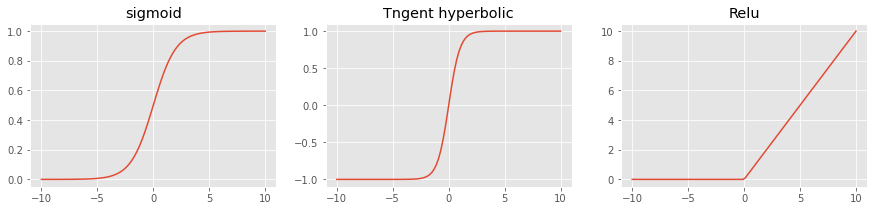

In [7]:
plt.style.use('ggplot')
plt.figure(figsize=(15,3))

plt.subplot(1,3,1)
plt.plot(x,y1, label= 'sigmoid')
plt.title('sigmoid')

plt.subplot(1,3,2)
plt.plot(x,y2, label= 'Tngent hyperbolic')
plt.title('Tngent hyperbolic')

plt.subplot(1,3,3)
plt.plot(x,y3, label= 'Relu')
plt.title('Relu')

plt.show()

## Relu forward

In [8]:
def Relu_forward(x):
    cache = x
    out = np.maximum(0,x)
    return out, cache

## Relu backward

In [9]:
def Relu_backward(dout, cache):
    x = cache
    dx = dout * (x > 0)
    return dx

## Sandwich layers

In [10]:
from layers import affine_forward, affine_backward, relu_forward, relu_backward

In [11]:
def affine_Relu_forward(x, w, b):
    out, cache_a = affine_forward(x, w, b)
    out, cache_r = relu_forward(out)
    return out, (cache_a, cache_r)

In [12]:
def affine_Relu_backward(dout, cache):
    cache_a, cache_r = cache
    dout = relu_backward(dout, cache_r)
    dx, dw, db = affine_backward(dout, cache_a)
    return dx, dw, db

# Implementing a 2_layer Neural 

In [13]:
from layers import softmax_loss

def two_layer_network_loss(x, y, params):
    w1, b1 = params['w1'], params['b1'] 
    w2, b2 = params['w2'], params['b2']
    
    # forward step
    h, cache_h = affine_Relu_forward(x, w1, b)
    scores, cache_o = affine_forward(h, w2, b2)
    
    # compute data loss
    loss, dscors = softmax_loss(scores, y)
    
    # backward step
    dh, dw2, db2 = affine_backward(dscors, cache_o)
    _, dw, db1 = affine_backward(dh, cache_h)
    
    grads = {'w1': dw1, 'b1':db1, 'w2': dw2, 'b2':db2}
    
    return loss, grads

In [14]:
def predict(x, params):
    w1, b1 = params['w1'], params['b1']
    w2, b2 = params['w2'], params['b2']
    
    h, _ = affine_Relu_forward(x, w1, b1)
    scores, _ = affine_forward(h, w2, b2)
    
    return np.argmax(scores, axis=1)

In [15]:
def accuracy(y_pred, y_true):
    return 100.0 * np.mean(y_pred == y_true)

# Putting All Together: data, model, loss, optimization

#### Data

In [16]:
print('training shape 2d:', x_train.shape)
print('Validation data 2d:', x_val.shape)
print('test data 2d:', x_test.shape)
print('dev data 2d:', x_dev.shape)

training shape 2d: (49000, 3072)
Validation data 2d: (1000, 3072)
test data 2d: (10000, 3072)
dev data 2d: (500, 3072)


### initialize weights

In [17]:
n_input = 3072
n_hiddens = 100
n_classes = 10

# initialize parameters
params = {}
params['w1'] = 0.0001 * np.random.randn(n_input, n_hiddens)
params['b1'] = np.zeros((n_hiddens))
params['w2'] = 0.0001 * np.random.randn(n_hiddens, n_classes)
params['b2'] = np.zeros((n_classes))